In [19]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
import pandas as pd
import platforms as pt
from config import MONTHS, MONTHS_DTYPE, NAME, PRIMARY_KEY, PLATFORMS, TOP_N, FILTERS, METRICS
import numpy as np
import seaborn as sns
from uts import weighted_average

from config import METRICS, MONTHS, PLATFORMS, PRIMARY_KEY
from matplotlib_venn import venn2, venn2_circles
import warnings
warnings.filterwarnings("ignore")
import data_visualization as dv
plt.rcdefaults()
print()

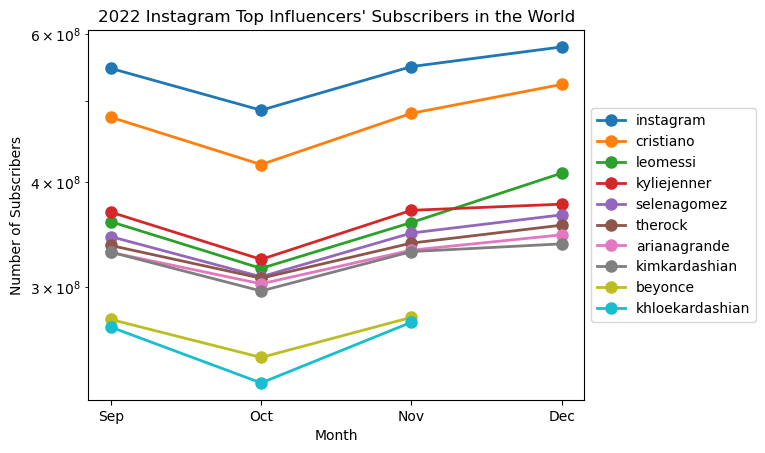

In [20]:
# line chart example
platform = 'Instagram'
metric = 'Subscribers'
top_n = 10
df_platform = pt.Social(platform)
df_medias_months = df_platform.load_dfs(platform)
df_medias_weighted_subs = weighted_average(df_medias_months, metric)
dv.line_chart(df_medias_months, df_medias_weighted_subs, platform='Instagram').show()

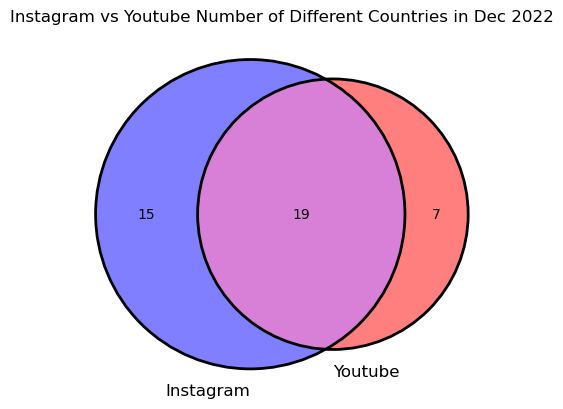

In [21]:
# venn diagram example
instagram = pd.read_csv("../data/Instagram/Instagram_Dec.csv")
youtube = pd.read_csv("../data/Youtube/Youtube_Dec.csv")
platform = 'Instagram'
month = 'Dec'
dv.venn_diagram(instagram, youtube, month).show()

Text(0.5, 1.0, 'Top categories for Sports with a ball based on AggregatedSubscribers')

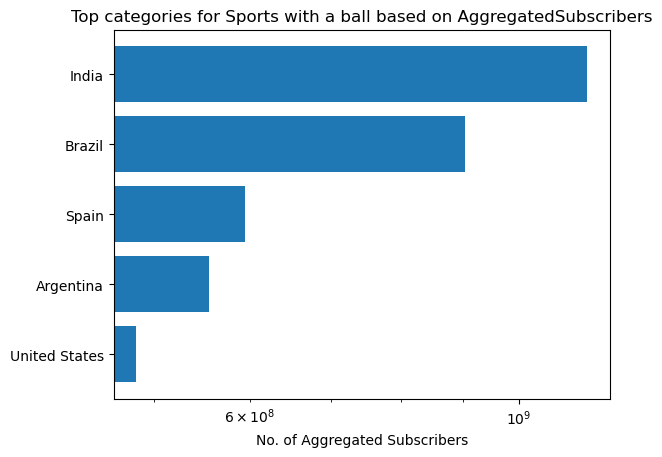

In [22]:
# bar graph example
df_filter = 'Country'
metric = 'Subscribers'
month = 'Dec'
platform = 'Instagram'
platform = pt.Social(platform)
colors = dv.get_colors(len(instagram))
df_cat = platform.get_N_most_popular_country(pt.Social.filter_by_month(
        platform.df, month), metric, 5, platform.get_category_items(FILTERS[1])[0])

fig, ax = plt.subplots()
ax.barh(df_cat[FILTERS[0]],
                df_cat['Aggregated '+metric], align='center')
ax.set_xlabel("No. of Aggregated "+metric)
ax.set_xscale('log')
ax.invert_yaxis()
ax.set_title("Top countries for "+ platform.get_category_items(FILTERS[1])[0] + " based on Aggregated" + metric)

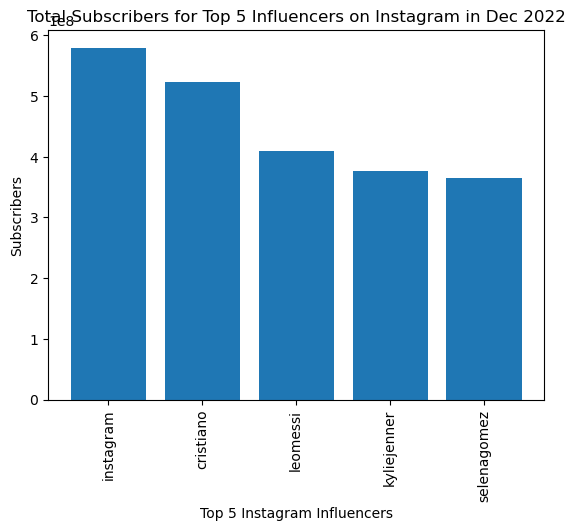

In [23]:
# histogram example
df_filter = PRIMARY_KEY
metric = 'Subscribers'
platform = 'Instagram'
month = 'Dec'
instagram = pt.Social(platform)
instagram = pt.Social.filter_by_month(instagram.df, month)
dv.plot_histogram(instagram, platform, month, df_filter, metric, top_n=5);

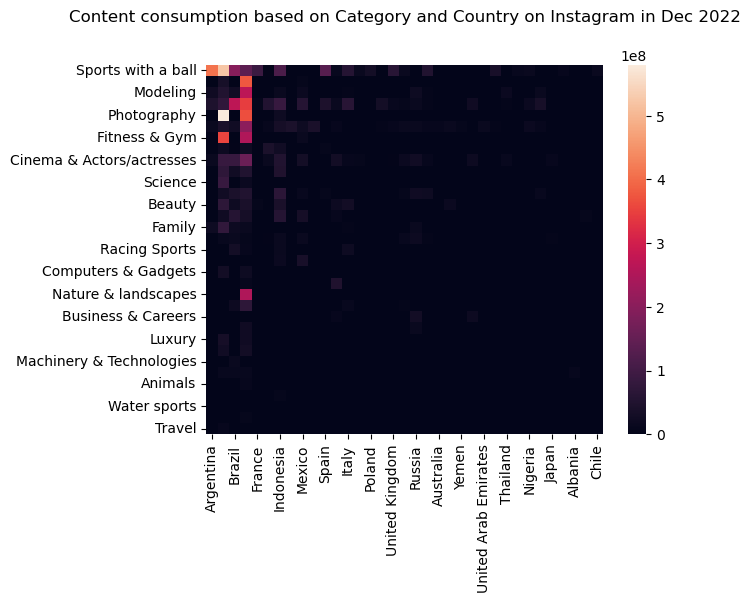

In [24]:
# heatmap
instagram = pd.read_csv("../data/Instagram/Instagram_Dec.csv")
platform = 'Instagram'
month = 'Dec'
platform_9a=pt.Social(platform)
df=platform_9a.filter_by_month(
            platform_9a.df, month)
dv.heatmap(df, platform, month).show()

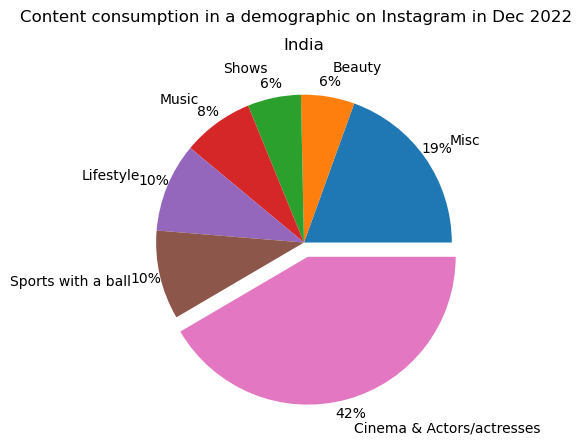

In [25]:
# pie chart
instagram = pd.read_csv("../data/Instagram/Instagram_Dec.csv")
platform = 'Instagram'
month = 'Dec'
df_filter = 'Country'
metric = 'India'
dv.pie_chart(instagram, platform, month, df_filter, metric, '').show()

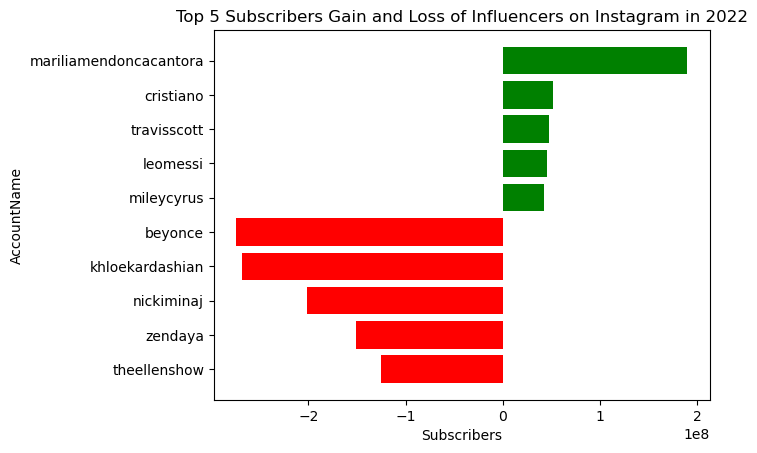

In [26]:
p = 'Instagram'
platform = pt.Social(p)
df_medias_months = platform.load_dfs(p)
df_medias_weighted_subs = weighted_average(df_medias_months, 'Subscribers')
dv.bi_directional(df_medias_months, platform=p, metric='Subscribers').show()